## Experiments: Comparing RSAST with other methods

In [1]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram']

In [2]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [3]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_AVRBC"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [4]:
# Set directory where the csv files are located

#filepath = os.getcwd()+'/ResultsSummarized/singleTrainTest.csv'
filepath = os.getcwd()+'/ResultsSummarized/Resamples_UCR_ARCHIVE.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df_other_methods

,dataset,score,method
0,ArrowHead,0.594000,FS_AVRBC
1,Beef,0.567000,FS_AVRBC
2,BeetleFly,0.700000,FS_AVRBC
3,BirdChicken,0.750000,FS_AVRBC
4,Car,0.750000,FS_AVRBC
...,...,...,...
3225,Wine,0.912037,HIVE-COTE_RES
3226,WordSynonyms,0.747962,HIVE-COTE_RES
3227,Worms,0.734026,HIVE-COTE_RES
3228,WormsTwoClass,0.783896,HIVE-COTE_RES


In [5]:

# Set directory where the csv files are located
df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/ResultsSummarized/Results_SAST_PAPER.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_MB"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])



In [6]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/Results_SAST_PAPER.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [7]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/Results_BAKE_OFF_ROCKET_PAPER.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_RROCK"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [8]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/Results_2018_DS_ROCKET_PAPER.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_RROCK"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [9]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/Resamples_RDST_PAPER.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["dataset_name"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'dataset_name':'dataset'})
df['method'] = df['method']+"_RDST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [10]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/Results_RDST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'dataset':'dataset','acc_mean':'score','model':'method'})
df['method'] = df['method']+"_RDST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [11]:
df_other_methods['method'].unique()

array(['FS_AVRBC', 'ROCKET_AVRBC', 'ELIS++_AVRBC', 'HIVE-COTEv1_AVRBC',
       'LS_AVRBC', 'BOSS_AVRBC', 'RISE_AVRBC', 'TSF_AVRBC',
       'InceptionTime_AVRBC', 'TS-CHIEF_AVRBC', 'S-BOSS_AVRBC',
       'STC_AVRBC', 'ResNet_AVRBC', 'ProximityForest_AVRBC',
       'WEASEL_AVRBC', 'Catch22_AVRBC', 'cBOSS_AVRBC', 'NB_RES',
       'C45_RES', 'SVML_RES', 'SVMQ_RES', 'Logistic_RES', 'BN_RES',
       'RandF_RES', 'RotF_RES', 'MLP_RES', 'Euclidean_1NN_RES',
       'DTW_R1_1NN_RES', 'DTW_Rn_1NN_RES', 'DDTW_R1_1NN_RES',
       'DDTW_Rn_1NN_RES', 'ERP_1NN_RES', 'LCSS_1NN_RES', 'MSM_1NN_RES',
       'TWE_1NN_RES', 'WDDTW_1NN_RES', 'WDTW_1NN_RES', 'DD_DTW_RES',
       'DTD_C_RES', 'DTW_F_RES', 'ST_RES', 'LS_RES', 'FS_RES', 'BoP_RES',
       'SAXVSM_RES', 'BOSS_RES', 'TSF_RES', 'TSBF_RES', 'LPS_RES',
       'ACF_RES', 'PS_RES', 'EE_RES', 'CID_DTW_RES', 'Flat-COTE_RES',
       'HIVE-COTE_RES', 'STC_MB', 'SAST', 'Rocket_RROCK', 'PF_RROCK',
       'BOSS_RROCK', 'ST_RROCK', 'ResNet_RROCK', 'HCTE_RROCK',

In [12]:
df_other_methods=df_other_methods[df_other_methods['method'].isin(['R_DST_RDST','R_DST_Ensemble_RDST','STC_RDST','HIVE-COTE 2.0_RDST', 'HIVE-COTEv1_0_RDST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_RROCK','STC_MB','SAST','ST_RROCK','CHIEF_RROCK'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['ELIS++_AVRBC','LS_AVRBC','FS_AVRBC', 'SAST'])]
df_other_methods['method'].unique()

array(['HIVE-COTE 2.0_RDST', 'HIVE-COTEv1_0_RDST', 'STC_RDST',
       'R_DST_RDST', 'R_DST_Ensemble_RDST'], dtype=object)

In [13]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
directories.append(os.getcwd()+'/ResultsRsast/Server17_not_used_sast')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_6410/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_6410/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of rege

/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_6410/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_6410/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_6410/2635555830.py:31: FutureWarning: The default value of rege

In [14]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['MiddlePhalanxOutlineAgeGroup', 'FreezerSmallTrain', 'Wafer',
       'Earthquakes', 'Beef', 'DistalPhalanxOutlineAgeGroup', 'ECG200',
       'ShapeletSim', 'ItalyPowerDemand', 'ToeSegmentation2',
       'TwoLeadECG', 'ProximalPhalanxOutlineCorrect', 'CBF',
       'ToeSegmentation1', 'TwoPatterns', 'WordSynonyms', 'UMD',
       'Strawberry', 'FaceAll', 'GunPointMaleVersusFemale',
       'GunPointOldVersusYoung', 'MelbournePedestrian', 'PowerCons',
       'SonyAIBORobotSurface2', 'BirdChicken',
       'ProximalPhalanxOutlineAgeGroup', 'Herring', 'CricketY',
       'FiftyWords', 'FreezerRegularTrain', 'Trace', 'Wine',
       'MiddlePhalanxOutlineCorrect', 'BeetleFly', 'FaceFour',
       'ProximalPhalanxTW', 'SwedishLeaf', 'SonyAIBORobotSurface1',
       'PhalangesOutlinesCorrect', 'ECG5000', 'GunPoint',
       'DodgerLoopWeekend', 'Meat', 'SmoothSubspace',
       'DiatomSizeReduction', 'CricketZ', 'CricketX',
       'ChlorineConcentration', 'ElectricDevices', 'Car',
       'GunPoin

In [15]:
len(df_result.dataset_name.unique())

98

In [16]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods

,dataset_name,accuracy,classifier_name
436,ACSF1,0.833333,HIVE-COTE 2.0_RDST
437,Adiac,0.795141,HIVE-COTE 2.0_RDST
438,ArrowHead,0.886286,HIVE-COTE 2.0_RDST
439,BME,0.999556,HIVE-COTE 2.0_RDST
440,Beef,0.796667,HIVE-COTE 2.0_RDST
...,...,...,...
215,StarLightCurves,0.979796,R_DST_Ensemble_RDST
218,HandOutlines,0.950541,R_DST_RDST
219,HandOutlines,0.951982,R_DST_Ensemble_RDST
222,EthanolLevel,0.736800,R_DST_RDST


In [17]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [18]:

concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"

In [19]:
concatenated_df['classifier_name'].unique()

array(['HIVE-COTE 2.0_RDST', 'HIVE-COTEv1_0_RDST', 'STC_RDST',
       'R_DST_RDST', 'R_DST_Ensemble_RDST', 'RSAST'], dtype=object)

In [20]:
len(concatenated_df.dataset_name.unique())

98

### Overall analysis

#### Accuracy: RSAST vs Other methods

/tmp/ipykernel_6410/853197985.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


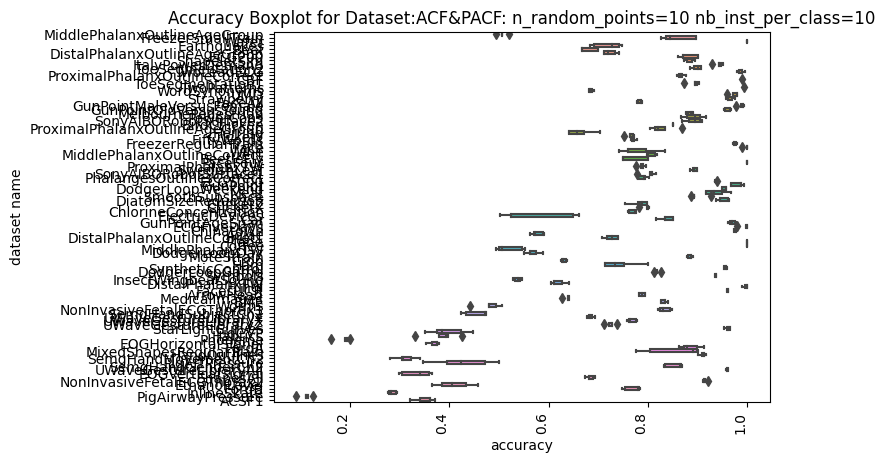

In [21]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc_per_ds.png')

In [22]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [23]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

                      mean  count   std  ci95_interval
dataset_name                                          
ACSF1                 0.35      5  0.02           0.02
Adiac                 0.58      5  0.01           0.01
ArrowHead             0.79      5  0.01           0.01
BME                   0.83      5  0.01           0.00
Beef                  0.68      5  0.02           0.02
...                    ...    ...   ...            ...
UWaveGestureLibraryZ  0.72      5  0.01           0.01
Wafer                 1.00      5  0.00           0.00
Wine                  0.78      5  0.04           0.03
WordSynonyms          0.68      5  0.00           0.00
Worms                 0.48      5  0.02           0.02

[98 rows x 4 columns]


In [24]:
# create a pivot table with the mean of score by hyperparameter
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
#t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
#t_score_by_method=score_by_method.transpose().round(2)
t_score_by_method.iloc[0:25,:]


classifier_name,HIVE-COTE 2.0_RDST,HIVE-COTEv1_0_RDST,RSAST,R_DST_Ensemble_RDST,R_DST_RDST,STC_RDST
dataset_name,,,,,,
ACSF1,0.833333,0.850000,0.350000,0.843333,0.837333,0.838333
Adiac,0.795141,0.796249,0.576982,0.802302,0.738107,0.793180
ArrowHead,0.886286,0.876000,0.788571,0.891238,0.881714,0.806667
BME,0.999556,0.982222,0.832000,0.989556,0.978889,0.929778
Beef,0.796667,0.735556,0.680000,0.751111,0.724444,0.735556
BeetleFly,0.903333,0.963333,0.770000,0.926667,0.913333,0.933333
BirdChicken,0.951667,0.940000,0.850000,0.936667,0.918333,0.870000
CBF,0.997926,0.998259,0.991333,0.996593,0.993889,0.985296
Car,0.907778,0.868889,0.836667,0.944444,0.951667,0.858333


In [25]:
t_score_by_method.iloc[25:49,:]

classifier_name,HIVE-COTE 2.0_RDST,HIVE-COTEv1_0_RDST,RSAST,R_DST_Ensemble_RDST,R_DST_RDST,STC_RDST
dataset_name,,,,,,
ECGFiveDays,0.997019,0.993767,0.995354,0.987418,0.991212,0.977894
EOGHorizontalSignal,0.815470,0.795672,0.369613,0.833610,0.787201,0.759853
EOGVerticalSignal,0.789871,0.762983,0.333149,0.768600,0.724862,0.713168
Earthquakes,0.748201,0.747482,0.717986,0.739089,0.741727,0.741966
ElectricDevices,0.898474,0.879709,0.571807,0.902049,0.895068,0.881775
EthanolLevel,0.835533,0.849000,0.409200,0.725600,0.736800,0.855733
FaceAll,0.986726,0.979724,0.783077,0.986726,0.985365,0.953688
FaceFour,0.967045,0.973106,1.000000,0.975758,0.992803,0.656439
FacesUCR,0.974602,0.961350,0.960293,0.966211,0.975902,0.910098


In [26]:
t_score_by_method.iloc[49:75,:]

classifier_name,HIVE-COTE 2.0_RDST,HIVE-COTEv1_0_RDST,RSAST,R_DST_Ensemble_RDST,R_DST_RDST,STC_RDST
dataset_name,,,,,,
InsectWingbeatSound,0.661869,0.640269,0.537273,0.670943,0.660455,0.628552
ItalyPowerDemand,0.961840,0.958179,0.942857,0.956722,0.953418,0.953806
Meat,0.990556,0.986111,0.936667,0.969444,0.975000,0.967778
MedicalImages,0.809605,0.740351,0.637632,0.786535,0.770833,0.709825
MelbournePedestrian,NaN,NaN,0.884789,NaN,NaN,NaN
MiddlePhalanxOutlineAgeGroup,0.717532,0.697835,0.506494,0.688745,0.675974,0.667532
MiddlePhalanxOutlineCorrect,0.836312,0.812944,0.806186,0.839748,0.823253,0.831501
MiddlePhalanxTW,0.592424,0.583766,0.519481,0.572078,0.560823,0.578571
MixedShapesRegularTrain,0.972893,0.965924,0.853856,0.984715,0.979354,0.960234


In [27]:
t_score_by_method.describe().round(2)

classifier_name,HIVE-COTE 2.0_RDST,HIVE-COTEv1_0_RDST,RSAST,R_DST_Ensemble_RDST,R_DST_RDST,STC_RDST
count,90.00,90.00,98.00,93.00,93.00,90.00
mean,0.89,0.88,0.77,0.88,0.88,0.85
std,0.12,0.13,0.21,0.12,0.13,0.13
min,0.39,0.37,0.11,0.39,0.34,0.36
25%,0.83,0.81,0.68,0.81,0.80,0.79
50%,0.93,0.93,0.83,0.93,0.92,0.89
75%,0.98,0.97,0.94,0.97,0.98,0.96
max,1.00,1.00,1.00,1.00,1.00,1.00


In [28]:
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)

In [29]:
for methods in t_score_by_method.columns.drop(hyperparameter):
    print("method: "+methods+" vs "+hyperparameter)
    total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("winning RSAST: "+str(total_wins))
    total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("losse RSAST: "+str(total_loss))
    total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("draws: "+str(total_draws))

method: HIVE-COTE 2.0_RDST vs RSAST
winning RSAST: 4
losse RSAST: 79
draws: 7
method: HIVE-COTEv1_0_RDST vs RSAST
winning RSAST: 8
losse RSAST: 74
draws: 8
method: R_DST_Ensemble_RDST vs RSAST
winning RSAST: 6
losse RSAST: 82
draws: 5
method: R_DST_RDST vs RSAST
winning RSAST: 6
losse RSAST: 79
draws: 8
method: STC_RDST vs RSAST
winning RSAST: 15
losse RSAST: 65
draws: 10


In [30]:
#wins of RSAST
#t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

In [31]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]

In [32]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
HIVE-COTE 2.0_RDST,0.0147
HIVE-COTEv1_0_RDST,0.0167
RSAST,0.0443
R_DST_Ensemble_RDST,0.0154
R_DST_RDST,0.0169
STC_RDST,0.0175


In [33]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
score_by_method

classifier_name,HIVE-COTE 2.0_RDST,HIVE-COTEv1_0_RDST,RSAST,R_DST_Ensemble_RDST,R_DST_RDST,STC_RDST
dataset_name,,,,,,
ACSF1,0.833333,0.850000,0.350000,0.843333,0.837333,0.838333
Adiac,0.795141,0.796249,0.576982,0.802302,0.738107,0.793180
ArrowHead,0.886286,0.876000,0.788571,0.891238,0.881714,0.806667
BME,0.999556,0.982222,0.832000,0.989556,0.978889,0.929778
Beef,0.796667,0.735556,0.680000,0.751111,0.724444,0.735556
...,...,...,...,...,...,...
UWaveGestureLibraryZ,0.803294,0.775144,0.724846,0.808608,0.797767,0.772473
Wafer,1.000000,0.999859,1.000000,0.999951,0.999865,0.999978
Wine,0.924691,0.891975,0.777778,0.947531,0.948765,0.885802


/tmp/ipykernel_6410/4029821119.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_6410/4029821119.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_6410/4029821119.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.s

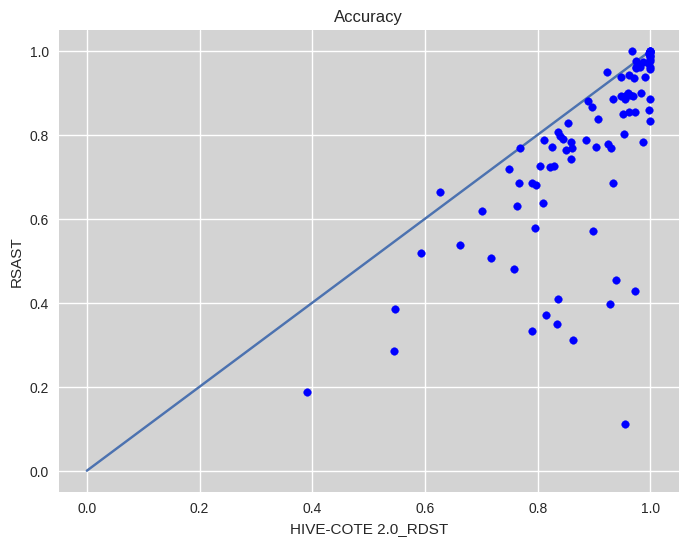

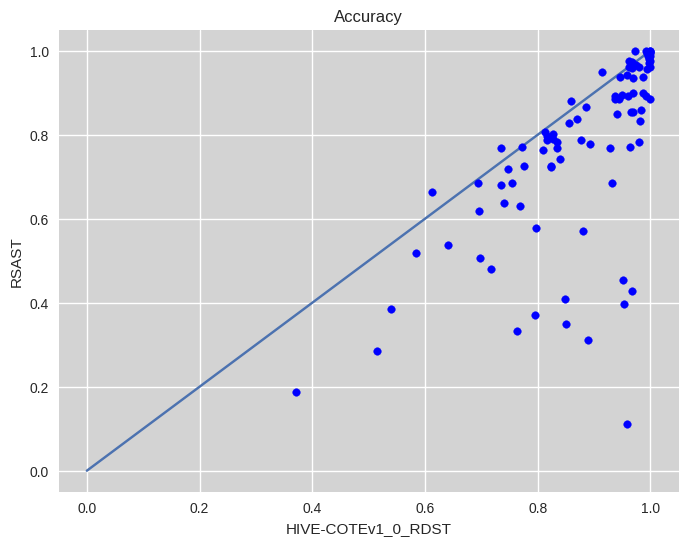

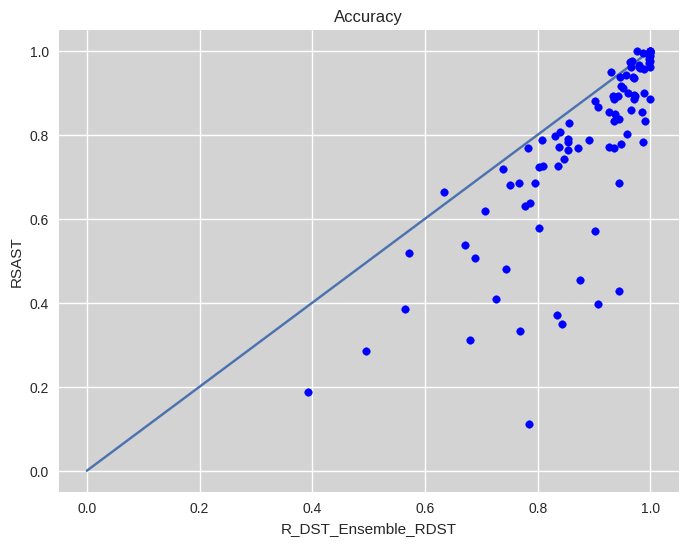

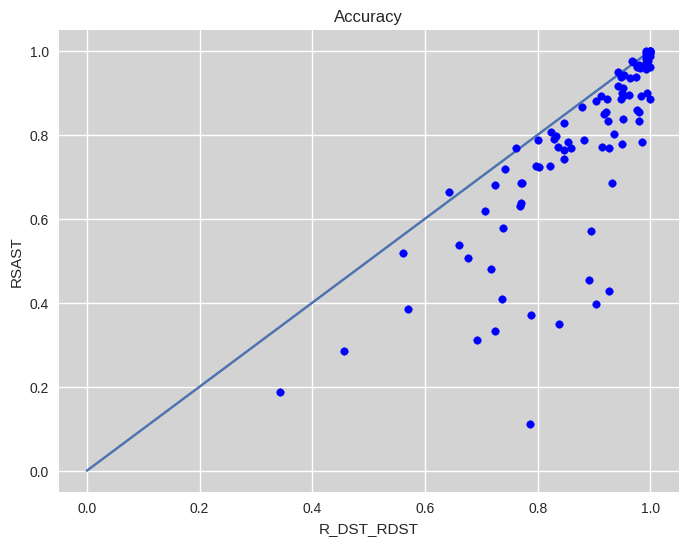

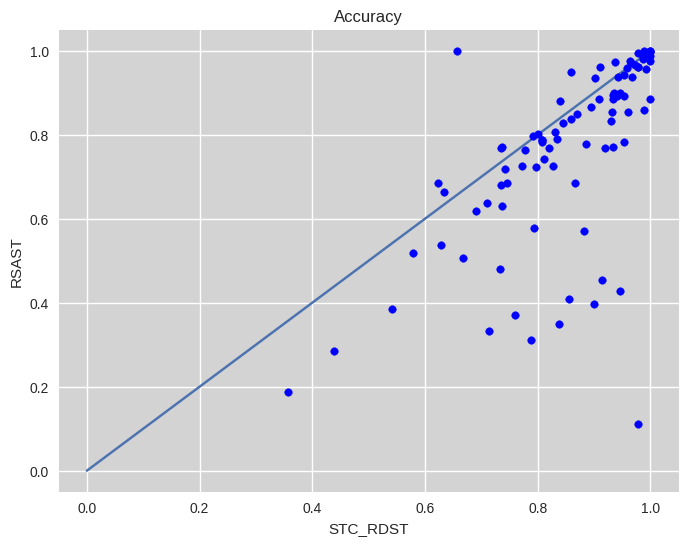

In [34]:
for method in score_by_method.columns.drop(hyperparameter):
    y=score_by_method[hyperparameter]
    x=score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [35]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10
dataset_name,
ACSF1,0.030428
Adiac,37.744124
ArrowHead,0.754680
BME,0.147789
Beef,4.014065
...,...
UWaveGestureLibraryZ,0.180508
Wafer,1.937638
Wine,0.262070


#### Generate CD Diagram comparison

In [36]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [37]:
#concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
HIVE-COTE 2.0_RDST,90
HIVE-COTEv1_0_RDST,90
RSAST,90
R_DST_Ensemble_RDST,90
R_DST_RDST,90
STC_RDST,90


In [38]:
concatenated_df.classifier_name.unique()

array(['HIVE-COTE 2.0_RDST', 'HIVE-COTEv1_0_RDST', 'STC_RDST',
       'R_DST_RDST', 'R_DST_Ensemble_RDST', 'RSAST'], dtype=object)

In [39]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

{0: 'RSAST', 1: 'STC_RDST', 2: 'R_DST_RDST', 3: 'HIVE-COTEv1_0_RDST', 4: 'R_DST_Ensemble_RDST', 5: 'HIVE-COTE 2.0_RDST'}
[2, 3]
[4, 5]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


In [40]:
df_perf["classifier_name"].unique()

array(['HIVE-COTE 2.0_RDST', 'HIVE-COTEv1_0_RDST', 'RSAST',
       'R_DST_Ensemble_RDST', 'R_DST_RDST', 'STC_RDST'], dtype=object)

In [41]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

,0
RSAST,5.361111
STC_RDST,4.466667
R_DST_RDST,3.305556
HIVE-COTEv1_0_RDST,3.183333
R_DST_Ensemble_RDST,2.566667
HIVE-COTE 2.0_RDST,2.116667
